In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:/TUTORIALS/Datas/Weather_Data.csv')
pd.set_option('display.max_columns',None)
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.shape

(8784, 8)

In [4]:
df.size

70272

In [6]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [7]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
for i in range(len(df.isna().sum())):
    if df.isna().sum()[i]>0:
        print('total missing values'+df.isna().sum().index[i]+':'+df.isna().sum()[i])

<AxesSubplot: >

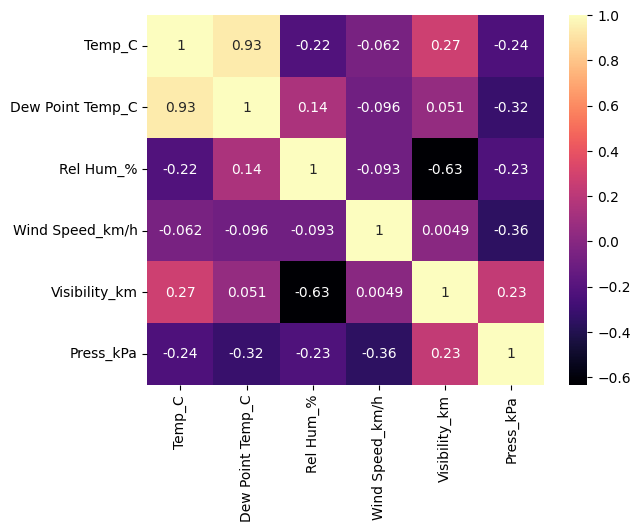

In [11]:
sns.heatmap(data=df.corr(),annot=True,cmap='magma')

In [13]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])
#extracting the year and convert it to a numeric representation
df['year'] = df['Date/Time'].dt.year.astype(int)

#extracting the month and convert it to a numeric representaion
df['month'] = df['Date/Time'].dt.month.astype(int)

#Extracting the day and convert it to a numeric representaion
df['day'] = df['Date/Time'].dt.day.astype(int)
#extracting the hour and minutes and covert it to a numerix representation 
df['hour'] = df['Date/Time'].dt.hour.astype(int)
df['minute'] = df['Date/Time'].dt.minute.astype(int)

In [14]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [16]:
df=df.reindex(columns=['Date/Time', 'year','month', 'day', 'hour', 'minute', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'])

In [17]:
x= df.iloc[:,1:-1].values
x

array([[2.0120e+03, 1.0000e+00, 1.0000e+00, ..., 4.0000e+00, 8.0000e+00,
        1.0124e+02],
       [2.0120e+03, 1.0000e+00, 1.0000e+00, ..., 4.0000e+00, 8.0000e+00,
        1.0124e+02],
       [2.0120e+03, 1.0000e+00, 1.0000e+00, ..., 7.0000e+00, 4.0000e+00,
        1.0126e+02],
       ...,
       [2.0120e+03, 1.2000e+01, 3.1000e+01, ..., 2.8000e+01, 4.8000e+00,
        9.9950e+01],
       [2.0120e+03, 1.2000e+01, 3.1000e+01, ..., 2.8000e+01, 9.7000e+00,
        9.9910e+01],
       [2.0120e+03, 1.2000e+01, 3.1000e+01, ..., 3.0000e+01, 1.1300e+01,
        9.9890e+01]])

In [18]:
y=df.iloc[:,-1].values
y

array(['Fog', 'Fog', 'Freezing Drizzle,Fog', ..., 'Snow', 'Snow', 'Snow'],
      dtype=object)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
x_train

array([[2.0120e+03, 1.2000e+01, 1.8000e+01, ..., 2.6000e+01, 8.0000e+00,
        9.9480e+01],
       [2.0120e+03, 8.0000e+00, 2.6000e+01, ..., 0.0000e+00, 2.4100e+01,
        1.0206e+02],
       [2.0120e+03, 3.0000e+00, 2.0000e+01, ..., 1.3000e+01, 2.4100e+01,
        1.0193e+02],
       ...,
       [2.0120e+03, 2.0000e+00, 7.0000e+00, ..., 1.9000e+01, 4.8300e+01,
        1.0194e+02],
       [2.0120e+03, 8.0000e+00, 4.0000e+00, ..., 1.3000e+01, 4.8300e+01,
        1.0175e+02],
       [2.0120e+03, 1.0000e+00, 1.0000e+01, ..., 1.5000e+01, 2.5000e+01,
        1.0115e+02]])

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train

array([[ 0.        ,  1.58449677,  0.25424702, ...,  1.27794794,
        -1.55610721, -1.86825321],
       [ 0.        ,  0.43143538,  1.16221793, ..., -1.72364471,
        -0.27979681,  1.19274888],
       [ 0.        , -1.00989135,  0.48123975, ..., -0.22284838,
        -0.27979681,  1.03851235],
       ...,
       [ 0.        , -1.29815669, -0.99421299, ...,  0.46982685,
         1.63863248,  1.05037669],
       [ 0.        ,  0.43143538, -1.33470209, ..., -0.22284838,
         1.63863248,  0.82495406],
       [ 0.        , -1.58642204, -0.6537239 , ...,  0.00804336,
        -0.20845027,  0.11309311]])

In [26]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array(['Rain', 'Clear', 'Mainly Clear', ..., 'Mainly Clear', 'Clear',
       'Mainly Clear'], dtype=object)

In [27]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[200,   9,   0, ...,   0,   0,   0],
       [ 38, 225,   2, ...,   0,   0,   0],
       [  0,   3,   1, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   1,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [28]:
score = accuracy_score(y_test,y_pred)
score

0.5040983606557377

In [29]:
nb_model =GaussianNB()
nb_model.fit(x_train,y_train)
nb_model.predict(x_test)

array(['Rain', 'Clear', 'Clear', ..., 'Mainly Clear', 'Mainly Clear',
       'Mainly Clear'], dtype='<U39')

In [30]:
nb_score = accuracy_score(y_test,y_pred)
nb_score

0.5040983606557377

In [31]:
nb_cr = classification_report(y_test,y_pred)
print(nb_cr)

                                precision    recall  f1-score   support

                         Clear       0.50      0.62      0.55       322
                        Cloudy       0.47      0.57      0.52       396
                       Drizzle       0.14      0.12      0.13         8
                   Drizzle,Fog       0.60      0.38      0.46        24
                  Drizzle,Snow       0.00      0.00      0.00         1
              Drizzle,Snow,Fog       0.50      1.00      0.67         2
                           Fog       0.50      0.69      0.58        39
              Freezing Drizzle       0.00      0.00      0.00         0
         Freezing Drizzle,Haze       1.00      1.00      1.00         1
         Freezing Drizzle,Snow       0.00      0.00      0.00         2
                  Freezing Fog       0.00      0.00      0.00         1
                 Freezing Rain       1.00      0.20      0.33         5
             Freezing Rain,Fog       0.00      0.00      0.00  